# Intro
The purpose of this assignment is to demonstrate my ability to create visualizations and explain those visualizations. I used a video game dataset which includes details such as Genre, Year released, ratings, and usage amongst different regions. In the case of this dataframe I skipped the traditional process of data cleaning and imputation as the demonstration of my ability to create these visualizations was this assignment's sole puppose.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('video_game.csv')

In [13]:
df.columns = ['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre',
       'Publisher', 'NA_players', 'EU_players', 'JP_players', 'Other_players',
       'Global_players', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating']

In [18]:
df

Unnamed: 0                           Name Platform    Year  \
0               1                     Wii Sports      Wii  2006.0   
1               2              Super Mario Bros.      NES  1985.0   
2               3                 Mario Kart Wii      Wii  2008.0   
3               4              Wii Sports Resort      Wii  2009.0   
4               5       Pokemon Red/Pokemon Blue       GB  1996.0   
...           ...                            ...      ...     ...   
16714       16715  Samurai Warriors: Sanada Maru      PS3  2016.0   
16715       16716               LMA Manager 2007     X360  2006.0   
16716       16717        Haitaka no Psychedelica      PSV  2016.0   
16717       16718               Spirits & Spells      GBA  2003.0   
16718       16719            Winning Post 8 2016      PSV  2016.0   

              Genre     Publisher  NA_players  EU_players  JP_players  \
0            Sports      Nintendo       41.36       28.96        3.77   
1          Platform      Nintendo       29.08        3.58        6.81   
2            Racing      Nintendo       15.68       12.76        3.79   
3            Sports      Nintendo       15.61       10.93        3.28   
4      Role-Playing      Nintendo       11.27        8.89       10.22   
...             ...           ...         ...         ...         ...   
16714        Action    Tecmo Koei        0.00        0.00        0.01   
16715        Sports   Codemasters        0.00        0.01        0.00   
16716     Adventure  Idea Factory        0.00        0.00        0.01   
16717      Platform       Wanadoo        0.01        0.00        0.00   
16718    Simulation    Tecmo Koei        0.00        0.00        0.01   

       Other_players  Global_players  Critic_Score  Critic_Count User_Score  \
0               8.45           82.53          76.0          51.0          8   
1               0.77           40.24           NaN           NaN        NaN   
2               3.29           35.52          82.0          73.0        8.3   
3               2.95           32.77          80.0          73.0          8   
4               1.00           31.37           NaN           NaN        NaN   
...              ...             ...           ...           ...        ...   
16714           0.00            0.01           NaN           NaN        NaN   
16715           0.00            0.01           NaN           NaN        NaN   
16716           0.00            0.01           NaN           NaN        NaN   
16717           0.00            0.01           NaN           NaN        NaN   
16718           0.00            0.01           NaN           NaN        NaN   

       User_Count Developer Rating  
0           322.0  Nintendo      E  
1             NaN       NaN    NaN  
2           709.0  Nintendo      E  
3           192.0  Nintendo      E  
4             NaN       NaN    NaN  
...           ...       ...    ...  
16714         NaN       NaN    NaN  
16715         NaN       NaN    NaN  
16716         NaN       NaN    NaN  
16717         NaN       NaN    NaN  
16718         NaN       NaN    NaN  

[16719 rows x 17 columns]

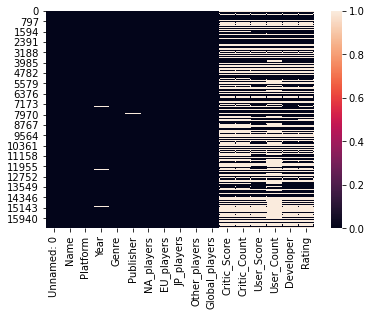

In [24]:
sns.heatmap(df.isnull())

In [33]:
dfn = df.dropna()

In [34]:
dfn['Year'].value_counts()

2008.0    592
2007.0    590
2005.0    562
2009.0    550
2006.0    528
2003.0    498
2004.0    476
2002.0    455
2011.0    453
2010.0    429
2012.0    313
2013.0    266
2001.0    256
2014.0    253
2016.0    212
2015.0    211
2000.0    102
1999.0     30
1998.0     25
1997.0     13
1996.0      7
1988.0      1
1992.0      1
1994.0      1
1985.0      1
Name: Year, dtype: int64

In [36]:
dfn['NA_%'] = dfn['NA_players']/dfn['Global_players']
dfn['EU_%'] = dfn['EU_players']/dfn['Global_players']
dfn['JP_%'] = dfn['JP_players']/dfn['Global_players']
dfn['Other_%'] = dfn['Other_players']/dfn['Global_players']

C:\Users\Allen\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
list = [1,2,3]

In [77]:
id_vars

['Unnamed: 0',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_players',
 'EU_players',
 'JP_players',
 'Other_players',
 'Global_players',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

In [81]:
id_vars = ['Unnamed: 0',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_players',
 'EU_players',
 'JP_players',
 'Other_players',
 'Global_players',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

value_vars = ['NA_players', 'EU_players', 'JP_players', 'Other_players']

In [82]:
for country in ['NA_players', 'EU_players', 'JP_players', 'Other_players']:
    id_vars.remove(country)
    

In [85]:
dfm = pd.melt(dfn, id_vars=id_vars, value_vars=['NA_players', 'EU_players', 'JP_players', 'Other_players'], var_name = 'region', value_name = 'players')

In [ ]:
dfm['region'] = dfm['region'].str.replace('_players', '')

dfm['player_percent'] = dfm['players'] / dfm['Global_players']

dfm['region_count'] =  dfm['player_percent'] * dfm['User_Count']

In [193]:
dfm2000 = dfm[dfm['Year'] >= 2000]
dfm_wii = dfm[dfm['Platform'] == 'WiiU']

Text(0, 0.5, 'percent of market')

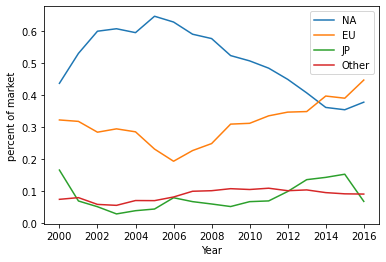

In [109]:
plt.plot(dfm2000.groupby(['region', 'Year']).player_percent.mean()['NA'])
plt.plot(dfm2000.groupby(['region', 'Year']).player_percent.mean()['EU'])
plt.plot(dfm2000.groupby(['region', 'Year']).player_percent.mean()['JP'])
plt.plot(dfm2000.groupby(['region', 'Year']).player_percent.mean()['Other'])
plt.legend(['NA', 'EU', 'JP', 'Other'])
plt.xlabel('Year')
plt.ylabel('percent of market')

Text(0, 0.5, 'percent of market')

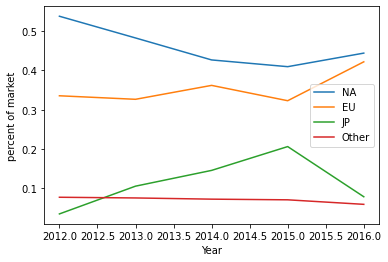

In [194]:
plt.plot(dfm_wii.groupby(['region', 'Year']).player_percent.mean()['NA'])
plt.plot(dfm_wii.groupby(['region', 'Year']).player_percent.mean()['EU'])
plt.plot(dfm_wii.groupby(['region', 'Year']).player_percent.mean()['JP'])
plt.plot(dfm_wii.groupby(['region', 'Year']).player_percent.mean()['Other'])
plt.legend(['NA', 'EU', 'JP', 'Other'])
plt.xlabel('Year')
plt.ylabel('percent of market')

In [118]:
dfm2000['Platform'].value_counts()

PS2     4560
X360    3432
PS3     3076
PC      2560
XB      2260
Wii     1916
DS      1856
PSP     1560
GC      1392
PS4      956
GBA      948
XOne     636
3DS      620
PSV      472
WiiU     356
PS       340
DC        44
Name: Platform, dtype: int64

In [186]:
publisher_count = df.groupby(['Publisher']).count().Name
publisher_count_10 = df.groupby(['Publisher']).count().Name > 10
publisher_count_13 = df.groupby(['Publisher']).count().Name > 275

publisher_count_13 = publisher_count[publisher_count_13]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

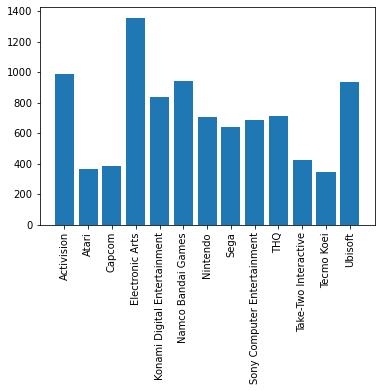

In [197]:
y = publisher_count_13.reset_index().iloc[0:,1].to_list()
x = publisher_count_13.reset_index().iloc[0:,0].to_list()
plt.bar(x,y)
plt.xticks(rotation='vertical')

## Graphs Only

**Q: How has the composition of players change over the past few years**

Text(0.5, 1.0, "North America's share of market decreases as EU becomes more invovled")

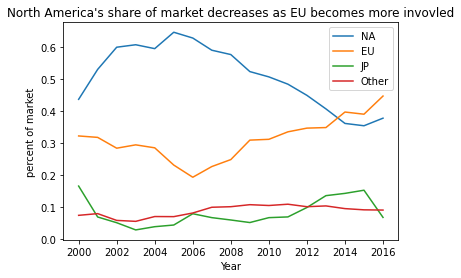

In [199]:
plt.plot(dfm2000.groupby(['region', 'Year']).player_percent.mean()['NA'])
plt.plot(dfm2000.groupby(['region', 'Year']).player_percent.mean()['EU'])
plt.plot(dfm2000.groupby(['region', 'Year']).player_percent.mean()['JP'])
plt.plot(dfm2000.groupby(['region', 'Year']).player_percent.mean()['Other'])
plt.legend(['NA', 'EU', 'JP', 'Other'])
plt.xlabel('Year')
plt.ylabel('percent of market')
plt.title("North America's share of market decreases as EU becomes more invovled")

**Q: Which of these consoles were the most played between 2013 and 2016**

Text(0.5, 1.0, 'Wii U remains slightly on top compared to PS4 and Xbox')

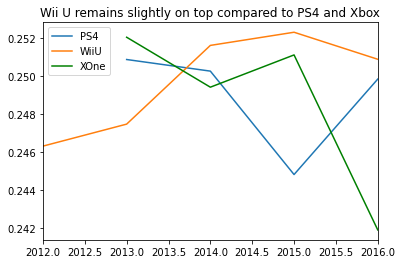

In [200]:
plt.plot(dfm2000.groupby(['Platform', 'Year']).player_percent.mean()['PS4'])
plt.plot(dfm2000.groupby(['Platform', 'Year']).player_percent.mean()['WiiU'])
plt.plot(dfm2000.groupby(['Platform', 'Year']).player_percent.mean()['XOne'], c = 'green')
plt.legend([ 'PS4', 'WiiU','XOne'])
plt.xlim(2012,2016)
plt.title("Wii U remains slightly on top compared to PS4 and Xbox")

**Q: Which regions carried the WII U popularity**

Text(0.5, 1.0, 'Market for Wii U reflects similar pattern to global trends')

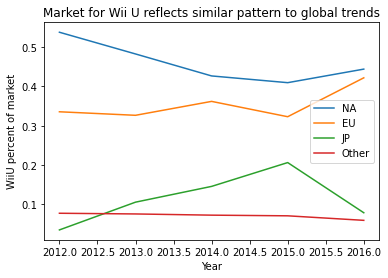

In [201]:
plt.plot(dfm_wii.groupby(['region', 'Year']).player_percent.mean()['NA'])
plt.plot(dfm_wii.groupby(['region', 'Year']).player_percent.mean()['EU'])
plt.plot(dfm_wii.groupby(['region', 'Year']).player_percent.mean()['JP'])
plt.plot(dfm_wii.groupby(['region', 'Year']).player_percent.mean()['Other'])
plt.legend(['NA', 'EU', 'JP', 'Other'])
plt.xlabel('Year')
plt.ylabel('WiiU percent of market')
plt.title('Market for Wii U reflects similar pattern to global trends')

**Q: Which developers produced the most games**

Text(0.5, 1.0, 'EA, Activision, and Ubisoft have developed the most games')

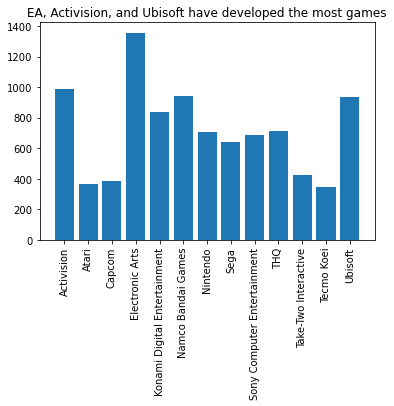

In [202]:
y = publisher_count_13.reset_index().iloc[0:,1].to_list()
x = publisher_count_13.reset_index().iloc[0:,0].to_list()
plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.title('EA, Activision, and Ubisoft have developed the most games')